# Prediction of Handwritten Numbers
Here I will use oneVsAll in logistic regression to predict handwritten numbers from an image

In [1]:
#Load Modules
from pandas import read_csv
import pandas as pd
from time import sleep
from numpy import ones, zeros, append, linspace, reshape, mean ,std, sum, array, dot,concatenate
from pylab import plot, scatter, xlabel, ylabel, contour,figure, show, axes, imshow
from scipy.optimize import fmin_bfgs, fmin_cg
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Here we import the images which are separated in a gray scale intensity in a 20x20 array
import scipy.io
dataA = scipy.io.loadmat('data/data7.mat')
data = append(dataA['X'],dataA['y'],axis=1) 

x = dataA['X']
y = dataA['y']

#Just checking the form of the arrays
print x.shape
print y.shape
print 'There are 5000 examples which correspond to hte number of rows and each image 20x20 array has been flatten into a row'
print 'We choose 10 random examples and print their label (number), there is no zero, 0 is represented by 10'
print y[randint(y.shape[0],size = 20)].T


(5000, 400)
(5000, 1)
There are 5000 examples which correspond to hte number of rows and each image 20x20 array has been flatten into a row
We choose 10 random examples and print their label (number), there is no zero, 0 is represented by 10
[[ 9  2  9  1  3  1  5  4  1  7  9  8  6  8  9  2  3  1 10 10]]


In [3]:
#function that takes an example array and converts it into an image in gray scale
#it shoes 200 examples
def showNumbers(x):
    im_number = 200
    imv = empty((20,0))
    imag = []
    for i in range(im_number):
        im = reshape(x[i],(20,20)).T
        imv = append(imv,im,axis=1)
        if (i+1) % 20 == 0:
            imag.append(imv)
            imv = empty((20,0))
    image = concatenate((imag[:]),axis = 0)
    imshow(image, cmap = cm.Greys_r)
    

This are some 200 examples of the images that serve as the training set


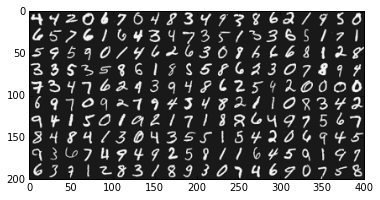

In [4]:
#Display 200 numbers randomly
shuffle(data)
showNumbers(data[:,:-1])
print 'This are some 200 examples of the images that serve as the training set'

In [5]:
#functions to be used
def sigmoid(z):
    return 1/(1+exp(-z))

def costFunction(theta,x,y, lamda=0):
    theta = reshape(theta,(theta.size,1))
    pred = sigmoid(dot(x,theta))
    J = mean(-y*log(pred)-(1-y)*log(1-pred))
    J = J + lamda*sum(square(theta[1:]))/(2*m)
    return J

def gradient(theta,x,y,lamda=0):
    theta = reshape(theta,(theta.size,1))
    pred = sigmoid(dot(x,theta))
    grad = dot(x.T,pred-y)/m
    grad[1:] = grad[1:] + lamda*theta[1:]/m
    return grad.flatten()

def prediction(theta,x,polDeg,mu=0,sigma=1):
    theta = reshape(theta,(theta.size,1))
    x.shape = (1,x.shape[0])
    x = (x-mu)/sigma
    X = createPolynomialFeatures(x, polDeg)
    pred = sigmoid(dot(X,theta))
    return pred

def accuracy(pred,y):
    pred.shape = (pred.size,1)
    return sum(pred == y%10)/float(y.shape[0])*100

#This function checks the probability of being number C and not C
def oneVsAll(theta,x,y,lamda,C,miter):
    Y = (y == C).astype(int)
    theta = fmin_cg(costFunction,inTheta,fprime = gradient,args=(X,Y,lamda), maxiter = miter,disp = 0)
    return theta
    

In [6]:
#initialize parameters
X = append(ones((x.shape[0],1)),x,axis=1)
m = X.shape[0]
n = X.shape[1]
inTheta = zeros(n)
lamda = .1;
maxIterations = 20
#run configuration for numbers C
Theta = empty((10,n))
for C in range(1,11):
    Theta[C % 10,:] = oneVsAll(inTheta,X,y,lamda, C, maxIterations)
    print 'Finished oneVsAll checking number: %d' %C
print 'All the numbers have been checked'

Finished oneVsAll checking number: 1
Finished oneVsAll checking number: 2
Finished oneVsAll checking number: 3
Finished oneVsAll checking number: 4
Finished oneVsAll checking number: 5
Finished oneVsAll checking number: 6
Finished oneVsAll checking number: 7
Finished oneVsAll checking number: 8
Finished oneVsAll checking number: 9
Finished oneVsAll checking number: 10
All the numbers have been checked


In [7]:
#We keep the prediction that gives the highest probability for a number.
allProb = sigmoid(dot(X,Theta.T))
prob = amax(sigmoid(dot(X,Theta.T)),axis=1)
pred = argmax(sigmoid(dot(X,Theta.T)),axis=1)
#We calculate the accuracy of the algorithm by cross reference with y
acc = accuracy(pred,y)

print 'The algorithm predicts %f %% of the examples correclty' %acc
print 'If you wish to the increase accuracy you can increase maxiter in function oneVsAll'
print 'currently maxiter = %d'%maxIterations
print 'You can also decrease lambda but beware of overfitting'
print 'currently lambda = %f'%lamda

The algorithm predicts 92.920000 % of the examples correclty
If you wish to the increase accuracy you can increase maxiter in function oneVsAll
currently maxiter = 20
You can also decrease lambda but beware of overfitting
currently lambda = 0.100000


In [8]:
#Here we show an animation showing the drawing and the prediction of the algorithm

from matplotlib.animation import FuncAnimation
from numpy.random import randint

%matplotlib qt
%matplotlib qt

def arrayToImage(i):
    X = reshape(x[i],(20,20)).T
    return X

def animate(*args):
    i = randint(5000)
    im = ax.imshow(arrayToImage(i), cmap = 'gray')
    prediction.set_text('Prediction: %d'%pred[i])
    return im,prediction

fig = plt.figure()
ax = plt.axes()
im = ax.imshow(arrayToImage(0), cmap = 'gray')
prediction = ax.text(.5, 1, '', color= 'white')

anim = FuncAnimation(fig, animate,interval = 1500)

print 'An external window should appear with the actual numbers and the prediction of the algorithm.'
print 'We can notice that even if accuracy is %f%% and not 100%%, the examples that it gets wrong it is'%acc 
print 'even difficult for a human to recognize it as a number with out prior knowledge of this.'

An external window should appear with the actual numbers and the prediction of the algorithm.
We can notice that even if accuracy is 92.920000% and not 100%, the examples that it gets wrong it is
even difficult for a human to recognize it as a number with out prior knowledge of this.
